# Implementing the gradient descent

The gradient descent (GD) is a first-order optimisation algorithm that is used in order to find the value $x_{min}$ for which the $f: \mathbb{R}^n \rightarrow \mathbb{R}$ gets its minimum (locally or globally)
Many approaches in this algorithm can be considered , thus we are going to treat 3 of them in this notebook :
1) Generalized Gradient Descent
2) Gradient Descent with Step Size Adjustment
3) Gradient Descent with Momentum

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

---
## 1- Generalized Gradient Descent :
The purpose here is to implement the basic gradient descent algorithm that uses a constant learning rate to minimize the given differentiable function
The gradient descent starts with an inital guess (a random value) for $x_0$ then it has an update rule of :
$$
x_{i+1}=x_i-\gamma \nabla f(x_i)
$$
with :
- $\nabla f(x_i)$ the **gradient** of $f$ at $x_i$ ,
for $f: \mathbb{R}^n \rightarrow \mathbb{R}$ , the gradient will be in $\mathbb{n \times 1}$ and each one of its entries is :
$$
\left[\nabla f(x)\right]_j = \frac{\partial f}{\partial x_j}
$$
- $\gamma$ is **the learning rate** and it is a constant scalar that controls the step size in the direction of the negative gradient

We will be working all the notebook long on 4 functions :
- $f_1:\mathbb{R} \rightarrow \mathbb{R}$
$$
f_1(x)=x^2
$$
- $f_2:\mathbb{R} \rightarrow \mathbb{R}$
$$
f_2(x)=sin(x) \cdot e^{-0.5x}
$$
- $f_3:\mathbb{R}^2 \rightarrow \mathbb{R}$
$$
f_3(x,y)=x^2+2y^2
$$
- $f_4:\mathbb{R}^5 \rightarrow \mathbb{R}$
Let $x=[x_1,x_2,x_3,x_4,x_5] \in \mathbb{R}^5$ . Then :
$$
f_4(x)=log(1+\sum_{i=1}^{5} x_i^2) + sin(x_1 \cdot x_2)
$$
We'll explore multiple approaches for computing gradients. While $f_1$ and $f_3$ have straightforward analytical gradients, $f_2$ and $f_4$ will demonstrate the value of symbolic or numerical differentiation.

In [3]:
def f_1(x):
    return x**2
def f_2(x):
    return np.sin(x)*np.exp(-0.5*x)
def f_3(x):
    return x[0]**2+2*x[1]**2
def f_4(x):
    return np.log(1+np.sum(x**2))+np.sin(x[0]*x[1])

The steps of implementation will be as following :

1. Defining the gradient for each function (manually or using the 2 methods to get the gradient : numerical approximation or `SymPy
2. Implementin the generalized GD function
3. Running the GD and analyzing the results


Else than getting the gradient analytically from the function , we can get the gradient using 2 methods :
1. *Numerical approximation* : it evolves the definition of the *finite difference approximations* :
$$
\frac{\partial f}{\partial x_i} ≈ \frac{f(x+he_i)-f(x-he_i)}{2h}
$$
with $e_i \in \mathbb{R}^n$ the **unit vector** in the $i$-th direction :
$$
e_i=[0,0,...,1,.....,0]^\top
$$
h is a scalar that represents a small perturbation (eg :$h=10^{-5}$
with 1 in the $i$-th position and 0 elsewhere
2. *SymPy* : `SymPy` is a python library for symbolic mathematics . It lets you manipulate expressions as symbols , it is used here to compute the exact gradient ,to avoid the human error and to transform the expressions into numerical functions to be used in code

### 1.1- Working on f_1(x):
$f_1:\mathbb{R} \rightarrow \mathbb{R}$
$$
f_1(x)=x^2
$$
The gradient of $f_1$ is $\nabla f(x)=2x$ was <u>analytically calculated</u> since it was easy to be extracted

In [4]:
def grad_f1(x):
    return 2*x

Now time for us to implement the gradient descent for $f_1$ to find the min :
The update rule is
$$
x_{i+1}=x_i-\gamma \nabla f(x_i)
$$
we will redo it for a certain number of iterations , so that the gradient descent algorithm will come to an end for non optimisable functions (the edge cases)
the `x0` will be a numpy array for now , since later we will be working on vector functions

In [5]:
def gradient_descent(f,grad_f,x0,gamma=0.1,n_iterations=100):
    x=x0.copy() #to keep the original x0
    trajectory=[x] #to store the variations of x
    losses=[f(x)] #to store the variations of f(x)
    for _ in range(n_iterations): #working on a fixed nb of iterations
        gradient=grad_f(x) #applying gradients
        x=x-gamma*gradient #the update rule
        trajectory.append(x.copy()) #we append a frozen copy of the value of x
        losses.append(f(x))
    return x,trajectory,losses

Now we will test the GD that we implemented

In [6]:
x_min,trajectory,losses=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=0.1,n_iterations=50)
print(x_min)

[7.13623846e-05]


The theoritical min should be 0 . We can check how close we are from the theoritical min in general using the rule :
$$
||x_{theoritical}-x_{calculated}||
$$
In our $f_1$ case , it is clearly `7.13623846e-05`

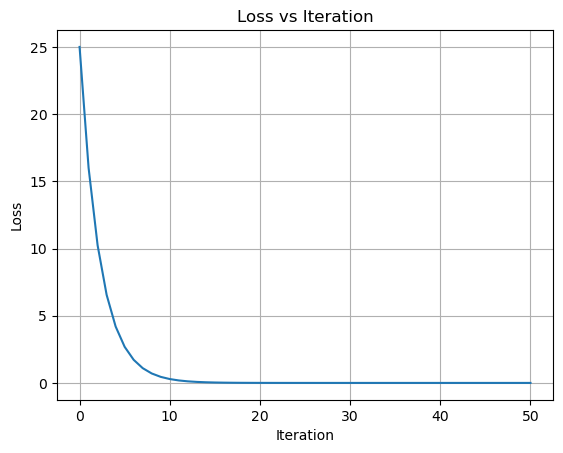

In [7]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.grid(True)
plt.show()


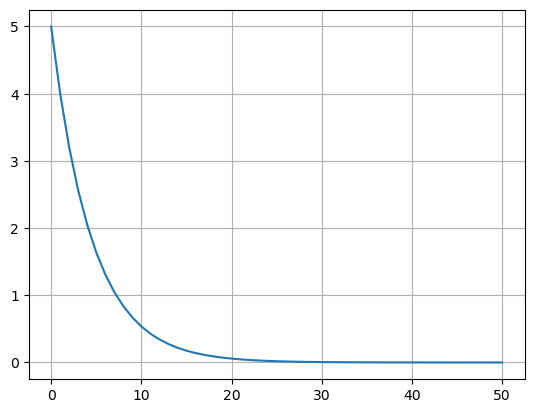

In [8]:
plt.plot(trajectory)
plt.grid(True)
plt.show()

From displaying the "loss" (the changes of $f(x)$ per iteration) and the trajectory of $x$, we can conclude that from about the 20th iteration ,the function gets to a minima . We might update the gradient function for future experiments by adding a tolerance stopping condition :

In [9]:
def gradient_descent(f,grad_f,x0,gamma=0.1,n_iterations=100,tolerance=1e-6):
    x=x0.copy()
    trajectory=[x]
    losses=[f(x)]
    for _ in range(n_iterations):
        gradient=grad_f(x)
        x=x-gamma*gradient
        trajectory.append(x.copy())
        losses.append(f(x))
        if np.linalg.norm(gamma * gradient) < tolerance:
            break
    return x,trajectory,losses

Now we can change the learning rate to display how it can affect the speed of convergance to the min :

Text(0.5, 1.0, 'Loss vs Iteration for different learning rates')

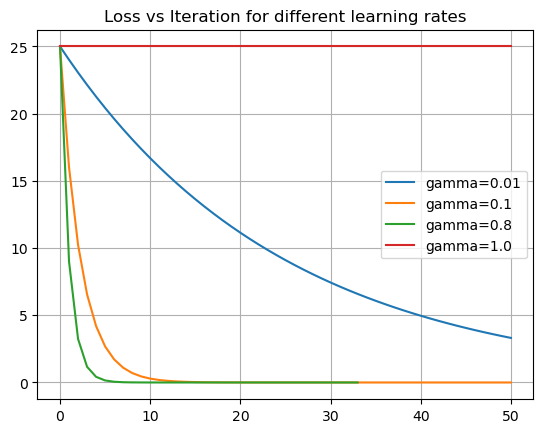

In [10]:
losses1=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=0.01,n_iterations=50)[-1]
losses2=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=0.1,n_iterations=50)[-1]
losses3=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=0.8,n_iterations=50)[-1]
losses4=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=1,n_iterations=50)[-1]
plt.plot(losses1,label='gamma=0.01')
plt.plot(losses2,label='gamma=0.1')
plt.plot(losses3,label='gamma=0.8')
plt.plot(losses4,label='gamma=1.0')
plt.legend()
plt.grid(True)
plt.title("Loss vs Iteration for different learning rates")

We might remarquably see here that the learning rates affected the speed of convergence toward the minima. In fact , if the $\gamma$ is low , the function will need more iterations to converge to the minima . If the function gets a high $\gamma$ it will converge in a nothing number of iterations . And if $\gamma =1$ , the function wont converge . This can be explained graphically by the fact that the updates of $x$ will oscillate between 5 and -5 . We can also explain this mathematically since $\nabla f(x)=2x$ , then $x_{i+1}=- x_{i}$ and $x_{i+2}=-x_{i+1}=x_i$ , then we will have the $x_i$ changing between 2 values : $x_0$ and $-x_0$

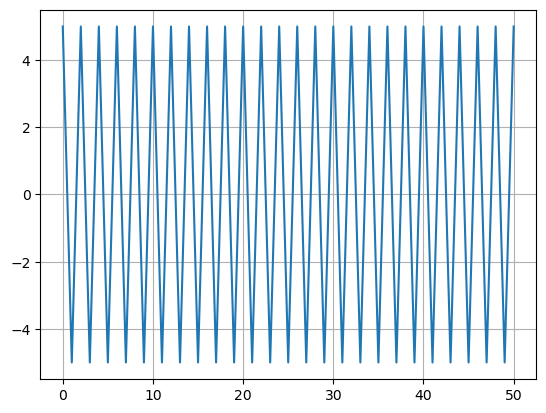

In [11]:
trj1=gradient_descent(f_1,grad_f1,x0=np.array([5]),gamma=1,n_iterations=50)[1]
plt.plot(trj1)
plt.grid(True)
plt.show()

All this could be intuitive for us to think about a "smarter" gradient descent algorithm that changes the learning rate to get the suitable function . But first let's work on the next 3 functions with our gradient descent function

### 1.3- Working on f_3(x):
$f_3:\mathbb{R}^2 \rightarrow \mathbb{R}$
$$
f_2(X)=x^2+2y^2
$$
The gradient of $f_2$ was <u>analytically calculated</u> since it is simple and differentiable:
$$
\nabla f(X) =
\begin{bmatrix}
\frac{\partial f}{\partial x} (X) \\
\frac{\partial f}{\partial y} (X)
\end{bmatrix}
=
\begin{bmatrix}
2x \\
4y
\end{bmatrix}
$$

In [12]:
def grad_f3(x):
    return np.array([2*x[0],4*x[1]])

Now we will launch our gradient descent over this function

the min is :  [7.13623846e-05 3.23312511e-11]


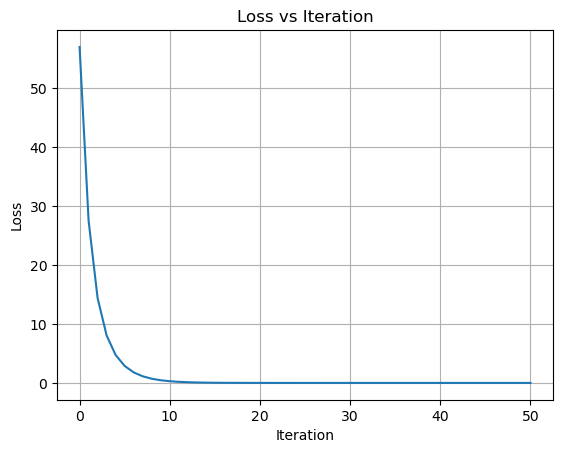

the error value :  7.136238463530533e-05


In [13]:
x_min,trajectory,losses=gradient_descent(f_3,grad_f3,x0=np.array([5,4]),gamma=0.1,n_iterations=50)
# showing the min
print("the min is : ",x_min)
# plotting the losses
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.grid(True)
plt.show()

print("the error value : ",np.linalg.norm(x_min))

We may observe that we reached the analytical minima through this method too which is $(0,0)$ with an error of : $7.14 \cdot 10^{-5}$

### 1.3- Working on f_2(x):
$f_2:\mathbb{R} \rightarrow \mathbb{R}$
$$
f_2(x)=sin(x) \cdot e^{-0.5x}
$$
The gradient of $f_2$ is not easy to get analytically and if we plot the function we might observe that it does not have a global minima. In fact and by plotting it from different start points , we can see that it always gets the oscillations up and down arround 0

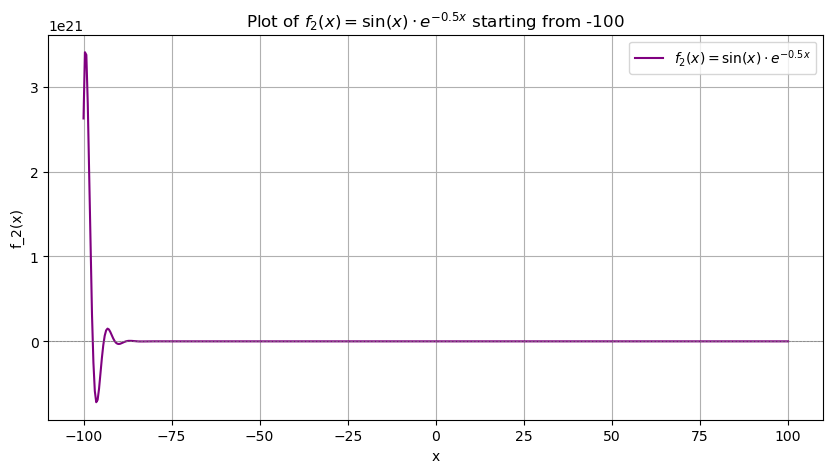

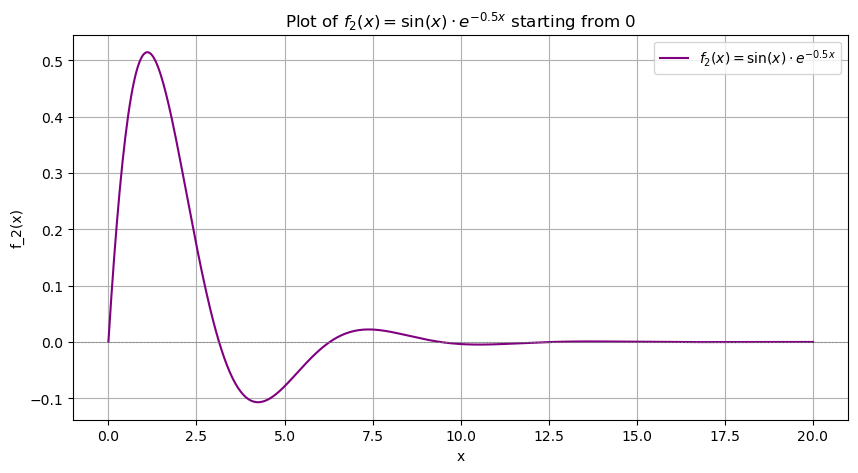

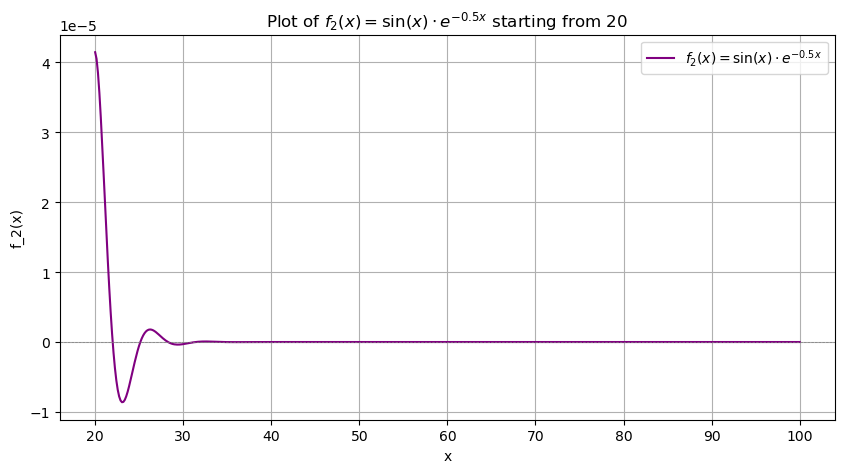

In [14]:
x_vals = np.linspace(-100, 100, 500)
y_vals = f_2(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f_2(x) = \sin(x) \cdot e^{-0.5x}$', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Plot of $f_2(x) = \sin(x) \cdot e^{-0.5x}$ starting from -100")
plt.xlabel("x")
plt.ylabel("f_2(x)")
plt.grid(True)
plt.legend()
plt.show()

x_vals = np.linspace(0, 20, 500)
y_vals = f_2(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f_2(x) = \sin(x) \cdot e^{-0.5x}$', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Plot of $f_2(x) = \sin(x) \cdot e^{-0.5x}$ starting from 0")
plt.xlabel("x")
plt.ylabel("f_2(x)")
plt.grid(True)
plt.legend()
plt.show()

x_vals = np.linspace(20, 100, 500)
y_vals = f_2(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f_2(x) = \sin(x) \cdot e^{-0.5x}$', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Plot of $f_2(x) = \sin(x) \cdot e^{-0.5x}$ starting from 20")
plt.xlabel("x")
plt.ylabel("f_2(x)")
plt.grid(True)
plt.legend()
plt.show()

Here then we will demonstrate the weakness of our gradient descent in finding the *local minima* for a function without a global minima

In [15]:
import sympy as sp

x = sp.Symbol('x')
f2_expr = sp.sin(x) * sp.exp(-0.5 * x)
grad_f2_expr = sp.diff(f2_expr, x)
grad_f2 = sp.lambdify(x, grad_f2_expr, modules='numpy')

print("Gradient expression of f_2:", grad_f2_expr)

Gradient expression of f_2: -0.5*exp(-0.5*x)*sin(x) + exp(-0.5*x)*cos(x)


We tried multiple things for this function without a global minima , such as launching the GD from various start points and visualising the different losses/start points

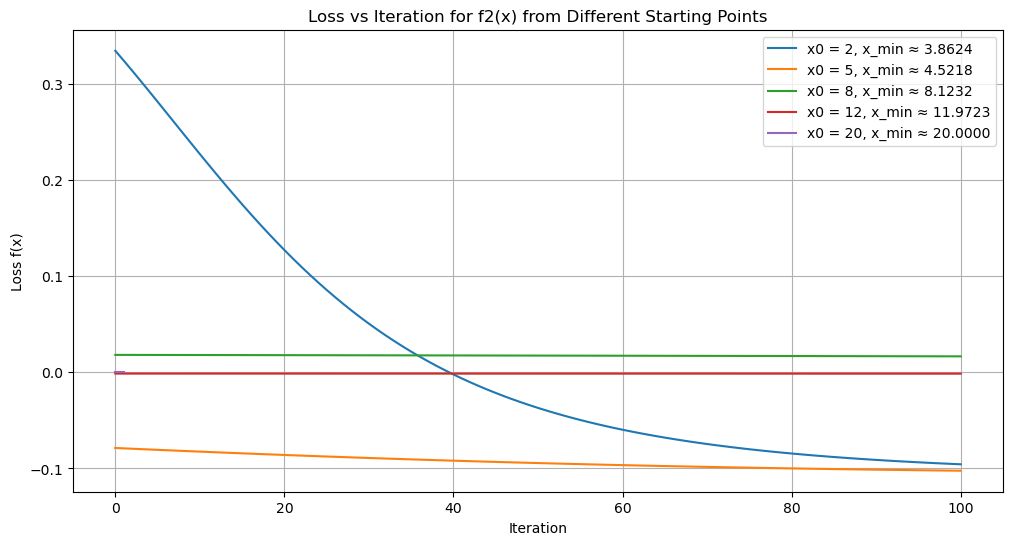

In [16]:
starting_points = [2, 5, 8, 12, 20]
results = []

for x0 in starting_points:
    x0_array = np.array([x0])
    x_min, trajectory, losses = gradient_descent(f_2, grad_f2, x0_array, gamma=0.1, n_iterations=100)
    results.append((x0, x_min[0], trajectory, losses))


plt.figure(figsize=(12, 6))
for x0, x_min, trajectory, losses in results:
    plt.plot(losses, label=f"x0 = {x0}, x_min ≈ {x_min:.4f}")
plt.xlabel("Iteration")
plt.ylabel("Loss f(x)")
plt.title("Loss vs Iteration for f2(x) from Different Starting Points")
plt.legend()
plt.grid(True)
plt.show()

To check if our results were right or not , we decided to implement a function that detectes wether a point is a local minima for a certain function or not . All by returning to the rule :
**If** $x$ **is a local minima then for** $\epsilon >0$ **,** $f(x)<f(x-\epsilon )$ **and** $f(x)<f(x+\epsilon )$

In [17]:
def is_local_minimum(f,x,epsilon=1e-4):
    left=f(x-epsilon)
    center=f(x)
    right=f(x+epsilon)
    return center<left and center<right

starting_points = [2, 5, 8, 12, 20]

for x0 in starting_points:
    x0_array = np.array([x0])
    x_min, trajectory, losses = gradient_descent(f_2, grad_f2, x0_array, gamma=0.1, n_iterations=100)
    print(x_min," is local minimum ? : ",is_local_minimum(f_2, x_min))

[3.862365]  is local minimum ? :  [False]
[4.52181052]  is local minimum ? :  [False]
[8.12319682]  is local minimum ? :  [False]
[11.97228595]  is local minimum ? :  [False]
[20.00000022]  is local minimum ? :  [False]


Obviously non of all the points we got was a local minima . This is because it can't be guaranteed 100% that the gradient descent might converge to a true minimum point . In fact , it can fall also on :
- A local maximum
- A saddle point (where the point might represents a minima for the function depending on a certain variable but not for the other variables)
- A flat plateau (a point where the function takes a sort of constant aspect)
- Any non-minimal critical point (just a point were all the partial derivatives are null)
---
The $\nabla f(x)≈0$ means just *there is no slope arround that point*

### 1.4- Working on f_4(x):
$f_4:\mathbb{R}^5 \rightarrow \mathbb{R}$
Let $x=[x_1,x_2,x_3,x_4,x_5] \in \mathbb{R}^5$ . Then :
$$
f_4(x)=log(1+\sum_{i=1}^{5} x_i^2) + sin(x_1 \cdot x_2)
$$
We will be working now on this function's gradient with the **numerical approximation** :
$$
\frac{\partial f}{\partial x_i} ≈ \frac{f(x+he_i)-f(x-he_i)}{2h}
$$
And building a new type of gradient that will hold the numerical approximation of our function

In [21]:
def gradient_descent(f,grad_f,x0,gamma=0.1,n_iterations=100,tolerance=1e-6):
    x=x0.copy()
    trajectory=[x]
    losses=[f(x)]
    for _ in range(n_iterations):
        gradient=grad_f(x)
        x=x-gamma*gradient
        print(x,f(x))
        trajectory.append(x.copy())
        losses.append(f(x))
        if np.linalg.norm(gamma * gradient) < tolerance:
            break
    return x,trajectory,losses

def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = x.copy()
        x_backward = x.copy()
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

def grad_f4(x):
    return numerical_gradient(f_4,x)

x0_array=np.array([1,1,0,0,0])
print(f_4(x0_array))
x_min, trajectory, losses = gradient_descent(f_4, grad_f4, x0_array, gamma=0.1, n_iterations=100)

1.9400832734760063
[-6233.6 -6233.6     0.      0.      0. ] 18.215715017964495
[-5611.33641354 -5611.33641354     0.             0.
     0.        ] 18.127500119076565
[-5058.58974332 -5058.58974332     0.             0.
     0.        ] 18.386580389346758
[-5448.89441357 -5448.89441357     0.             0.
     0.        ] 17.48902918095514
[-4952.26574718 -4952.26574718     0.             0.
     0.        ] 16.75404491337883
[-4804.33272406 -4804.33272406     0.             0.
     0.        ] 16.68117573302689
[-4681.10214457 -4681.10214457     0.             0.
     0.        ] 18.585352561505953
[-4748.3245693 -4748.3245693     0.            0.            0.       ] 16.83015476432845
[-5036.82143307 -5036.82143307     0.             0.
     0.        ] 17.78442717546237
[-5539.84170788 -5539.84170788     0.             0.
     0.        ] 16.953691741256147
[-5652.99050979 -5652.99050979     0.             0.
     0.        ] 18.66169498149021
[-6062.65753742 -6062.65753742    

[ 882.53935242 2444.95020134    0.            0.         -769.69904259]


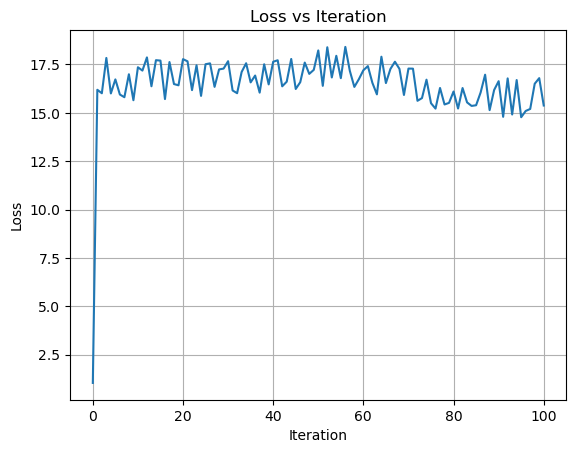

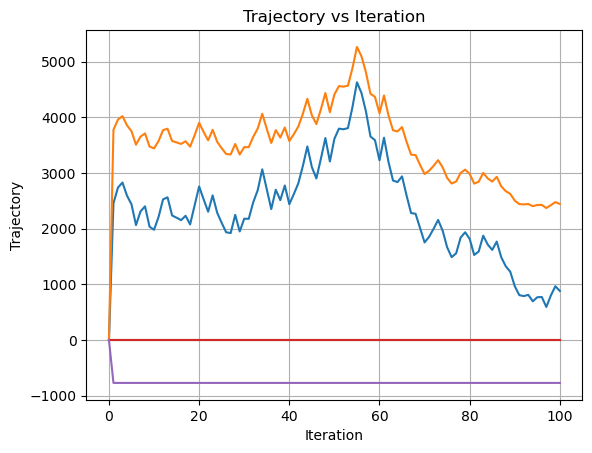

In [19]:
print(x_min)

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iteration")
plt.grid(True)
plt.show()

plt.plot(trajectory)
plt.xlabel("Iteration")
plt.ylabel("Trajectory")
plt.title("Trajectory vs Iteration")
plt.grid(True)
plt.show()

In [20]:
print(is_local_minimum(f_4,x_min))

False


## 2. Gradient Descent with step adjustment :
This approach of gradient descent does not differ a lot from the gradient descent we all know. The only difference is that it changes with each iteration the learning rate depending on the evolution of the loss (the function) :
* **If the function increases**, we will reduce the learning rate and wont save the step : $\gamma*=0.5$
* **If the function decreases**, we will increase the learning rate and save the changes : $\gamma*=1.05$
* **IMPORTANT :** Some approaches tend to work with slighter changes : $\gamma*=0.8$ and $\gamma*=1.1$ so the learning rate wont depass 1 . Others also might do control over the gamma and check each time wether it reached 1 or not

In [ ]:
def gradient_descent_step_adjustment(f,grad_f,x0,gamma=0.1,n_iterations=100):
    x=x0.copy()
    trajectory=[x.copy()]
    losses=[f(x)]
    for _ in range(n_iterations):
        grad=grad_f(x)
        new_x=x-gamma*grad
        new_loss=f(new_x)
        if new_loss>losses[-1]:
            gamma*=0.8
        else:
            x=new_x
            losses.append(new_loss)
            trajectory.append(x.copy())
            gamma*=1.1
    return x,trajectory,losses

## 3. Gradient Descent with Momentum
In cases of optimizing functions with irregular values or a function with a frequent direction change (like $f_2$ in our case) , it becomes crucial to tend to this approach of gradient descent algorithm . Its update formula is :
$$
x_{i+1}=x_i+\alpha (x_i-x_{i-1})-\gamma \nabla f(x_i)
$$
Where $\alpha$ here is the momentum rate and it controls the intertia here in this case

In [ ]:
def gradient_descent_momentum(f, grad_f, x0, gamma=0.1, alpha=0.9, n_iterations=100):
    x_prev = x0.copy()
    x = x0.copy()
    trajectory = [x.copy()]
    losses = [f(x)]

    # First step (standard GD step)
    grad = grad_f(x)
    x = x - gamma * grad
    trajectory.append(x.copy())
    losses.append(f(x))

    for _ in range(1, n_iterations):
        grad = grad_f(x)
        x_new = x + alpha * (x - x_prev) - gamma * grad
        x_prev = x
        x = x_new
        trajectory.append(x.copy())
        losses.append(f(x))

    return x, trajectory, losses
